In [1]:
import pyhepmc as hep
import os
import os
import json
import argparse
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np

In [9]:
file = "tag_1_pythia8_events.hepmc"
pid = [1000015]
status = [62,1,2]
toGeV = 1

staus=[]
daughter_particles = []
events=[]



In [10]:
with hep.open(file) as f:
    while True:
        evt = f.read()
        if not evt:
            break
        event ={}
        for particle in evt.particles:
            if abs(particle.pid) not in pid:
                continue
#            if particle.status not in status:
                continue
            stau ={}
            particlemom = particle.momentum
#            print('particlemom', particlemom)
            stau["eta"] = particlemom.eta() 
            stau["phi"] = particlemom.phi() 
            stau["pt" ] = particlemom.pt()/toGeV 
            stau["p"  ] = particlemom.length()/toGeV 
            stau["m"  ] = particlemom.m()/toGeV 
            stau["betagamma"]  = stau["p"]/stau["m"]
            # to get the production vertex and position
            prod_vertex = particle.production_vertex
            prod_vector = prod_vertex.position
            #record prod vertex
            stau["prod_x"] = prod_vector.x
            stau["prod_y"] = prod_vector.y
            stau["prod_z"] = prod_vector.z
            stau["prod_t"] = prod_vector.t
        #if stau decays:
            decayvtx = particle.end_vertex
            if(decayvtx) :
                 fourvec = decayvtx.position
                 products = decayvtx.particles_out
                 print("number of decay products is",len(products))
                 print("status of stau is",particle.status)
                 print("Decay location is: x",fourvec.x,", y",fourvec.y,", z",fourvec.z,", t",fourvec.t)
                 #record daughter particles
                 i = 0
                 for prod in products:
                     daughter_particle = {}
                     i += 1
                     daughter_mom = prod.momentum
                     daughter_vertex=prod.production_vertex
                     daughter_vector=daughter_vertex.position
                     print("momentum of ", i, "daughter particle is", daughter_mom)
                     daughter_particle["eta"] = daughter_mom.eta() 
                     daughter_particle["phi"] = daughter_mom.phi() 
                     daughter_particle["pt" ] = daughter_mom.pt()/toGeV 
                     daughter_particle["p"  ] = daughter_mom.length()/toGeV 
                     daughter_particle["x"] = daughter_vector.x
                     daughter_particle["y"] = daughter_vector.y
                     daughter_particle["z"] = daughter_vector.z
                     daughter_particle["t"] = daughter_vector.t
                     daughter_particles.append(daughter_particle)
                     
                 #record decay position
                 stau["decay_lxy"]        =  fourvec.perp() 
                 stau["decay_x"]          =  fourvec.x 
                 stau["decay_y"]          =  fourvec.y 
                 stau["decay_z"]          =  fourvec.z 
                 stau["decay_t"]          =  fourvec.t
                


         #else it is stable:  
            else:
                print("stable")
                stau["lxy"] = 999999
                stau["decay_z"]   = 999999  
                stau["decay_t"] = 999999 
                stau["decay_x"] =  999999
                stau["decay_y"] = 999999
            stau["lifetime"]= stau["decay_t"]-stau["prod_t"]
        staus.append(stau)

        

number of decay products is 2
status of stau is 22
Decay location is: x 0.0 , y 0.0 , z 0.0 , t 0.0
momentum of  1 daughter particle is FourVector(-1.64e+03, -3.11e+03, -3.56e+03, 5e+03)
momentum of  2 daughter particle is FourVector(4.3e-09, -2.69e-08, 2.17e-08, 3.48e-08)
number of decay products is 1
status of stau is 22
Decay location is: x 0.0 , y 0.0 , z 0.0 , t 0.0
momentum of  1 daughter particle is FourVector(1.64e+03, 3.11e+03, 3.56e+03, 5e+03)
number of decay products is 2
status of stau is 51
Decay location is: x -682.5730978040326 , y -1296.6154922512435 , z -1484.3120632227615 , t 2086.492238363071
momentum of  1 daughter particle is FourVector(-1.07e+03, -1.96e+03, -2.34e+03, 3.23e+03)
momentum of  2 daughter particle is FourVector(-568, -1.15e+03, -1.22e+03, 1.77e+03)
number of decay products is 2
status of stau is 52
Decay location is: x 49.69930464788871 , y 94.40877258217758 , z 108.07527817858391 , t 151.92103752046742
momentum of  1 daughter particle is FourVector(5

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



number of decay products is 1
status of stau is 22
Decay location is: x 0.0 , y 0.0 , z 0.0 , t 0.0
momentum of  1 daughter particle is FourVector(3.37e+03, -1.77e+03, -3.25e+03, 5e+03)
number of decay products is 2
status of stau is 22
Decay location is: x 0.0 , y 0.0 , z 0.0 , t 0.0
momentum of  1 daughter particle is FourVector(-3.37e+03, 1.77e+03, 3.25e+03, 5e+03)
momentum of  2 daughter particle is FourVector(-3.64e-06, 4.81e-06, 4.36e-06, 7.44e-06)
number of decay products is 1
status of stau is 52
Decay location is: x 0.0 , y 0.0 , z 0.0 , t 0.0
momentum of  1 daughter particle is FourVector(3.37e+03, -1.77e+03, -3.25e+03, 5e+03)
number of decay products is 2
status of stau is 51
Decay location is: x 0.0 , y 0.0 , z 0.0 , t 0.0
momentum of  1 daughter particle is FourVector(-3.37e+03, 1.77e+03, 3.25e+03, 5e+03)
momentum of  2 daughter particle is FourVector(-3.07e-11, 1.7e-11, 3.04e-11, 4.64e-11)
number of decay products is 2
status of stau is 52
Decay location is: x 9360.767295

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
p = np.array([x['p'] for x in staus]) 
pt = np.array([x['pt'] for x in staus]) 
eta = np.array([x['eta'] for x in staus]) 
phi = np.array([x['phi'] for x in staus]) 
m = np.array([x['m'] for x in staus]) 
prod_x = np.array([x['prod_x'] for x in staus]) 
prod_y = np.array([x['prod_y'] for x in staus])
prod_z = np.array([x['prod_z'] for x in staus])
prod_t = np.array([x['prod_t'] for x in staus])
decay_x = np.array([x['decay_x'] for x in staus])
decay_y = np.array([x['decay_y'] for x in staus])
decay_z = np.array([x['decay_z'] for x in staus])
decay_t = np.array([x['decay_t'] for x in staus])
betagamma = np.array([x['betagamma'] for x in staus])
c = 3*10**8
lifetime = np.array([x['lifetime']/c for x in staus])



(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   1.,   1.,   1.,   5.,   8.,   6.,   5.,
          6.,   7.,   9.,  18.,  28.,  33.,  36.,  37.,  75.,  88., 107.,
        112., 160., 212., 242., 281., 363., 396., 422., 508., 505., 578.,
        547., 523., 593., 589., 538., 491., 420., 397., 299., 307., 237.,
        182., 151., 106.,  93.,  68.,  54.,  32.,  32.,  16.,  19.,  15.,
          9.,   9.,   3.,   2.,   7.,   1.,   2.,   1.,   3.,   0.,   0.,
          1.]),
 array([-5.25712606, -5.17909177, -5.10105748, -5.02302319, -4.9449889 ,
        -4.86695461, -4.78892032, -4.71088603, -4.63285174, -4.55481745,
        -4.47678315, -4.39874886, -4.32071457, -4.24268028, -4.16464599,
        -4.0866117 , -4.00857741, -3.93054312, -3.85250883, -3.77447454,
        -3.69644025, -3.61

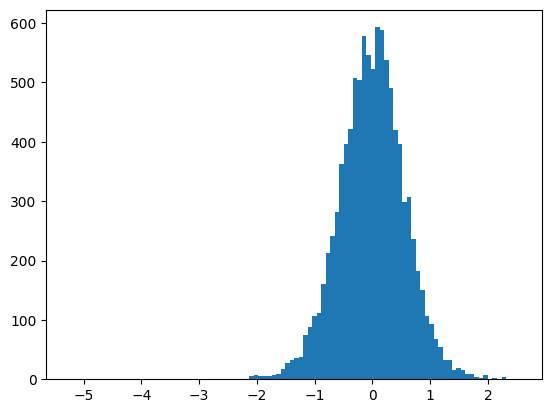

In [13]:
plt.hist(eta,100)

505.21879053118573


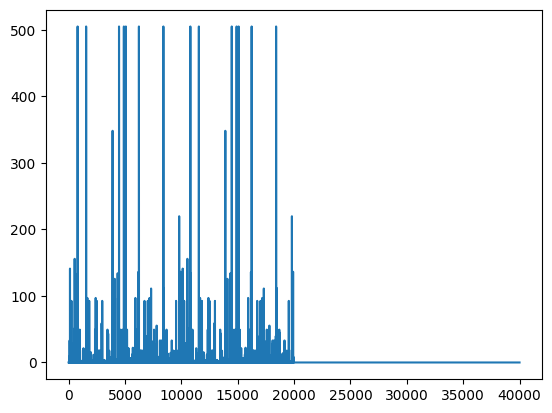

In [95]:
#check if lifetime and velocity in lab frame makes sense
v = c*np.tanh(np.arcsinh(betagamma))
dist = np.sqrt(decay_x**2+decay_y**2+decay_z**2)
print(max(dist-vt))


Text(0.5, 1.0, ' histogram of R of displaced vertex')

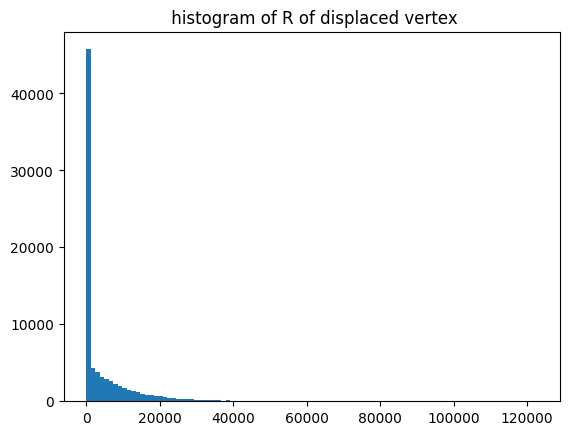

In [32]:
#checking daughter particles:
dau_phi = np.array([x['phi'] for x in daughter_particles]) 
dau_r = np.array([np.sqrt(x['x']**2+x['y']**2) for x in daughter_particles])
plt.hist(dau_r,100)
plt.title(" histogram of R of displaced vertex")

Text(0.5, 1.0, 'histogram of phi of daughter particles')

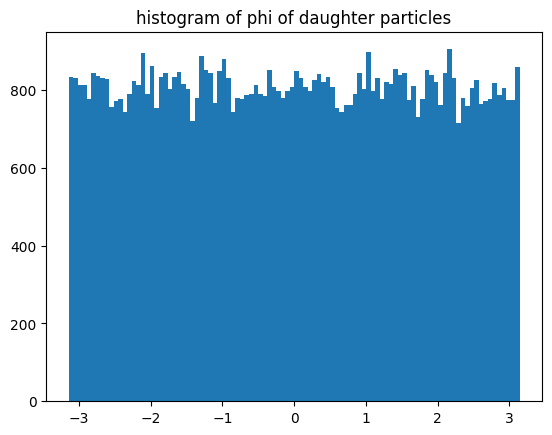

In [33]:
plt.hist(dau_phi,100)
plt.title("histogram of phi of daughter particles")